C:\Users\huash\AppData\Local\Temp\ipykernel_11900\2888467902.py:121: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.08, 1, 1])


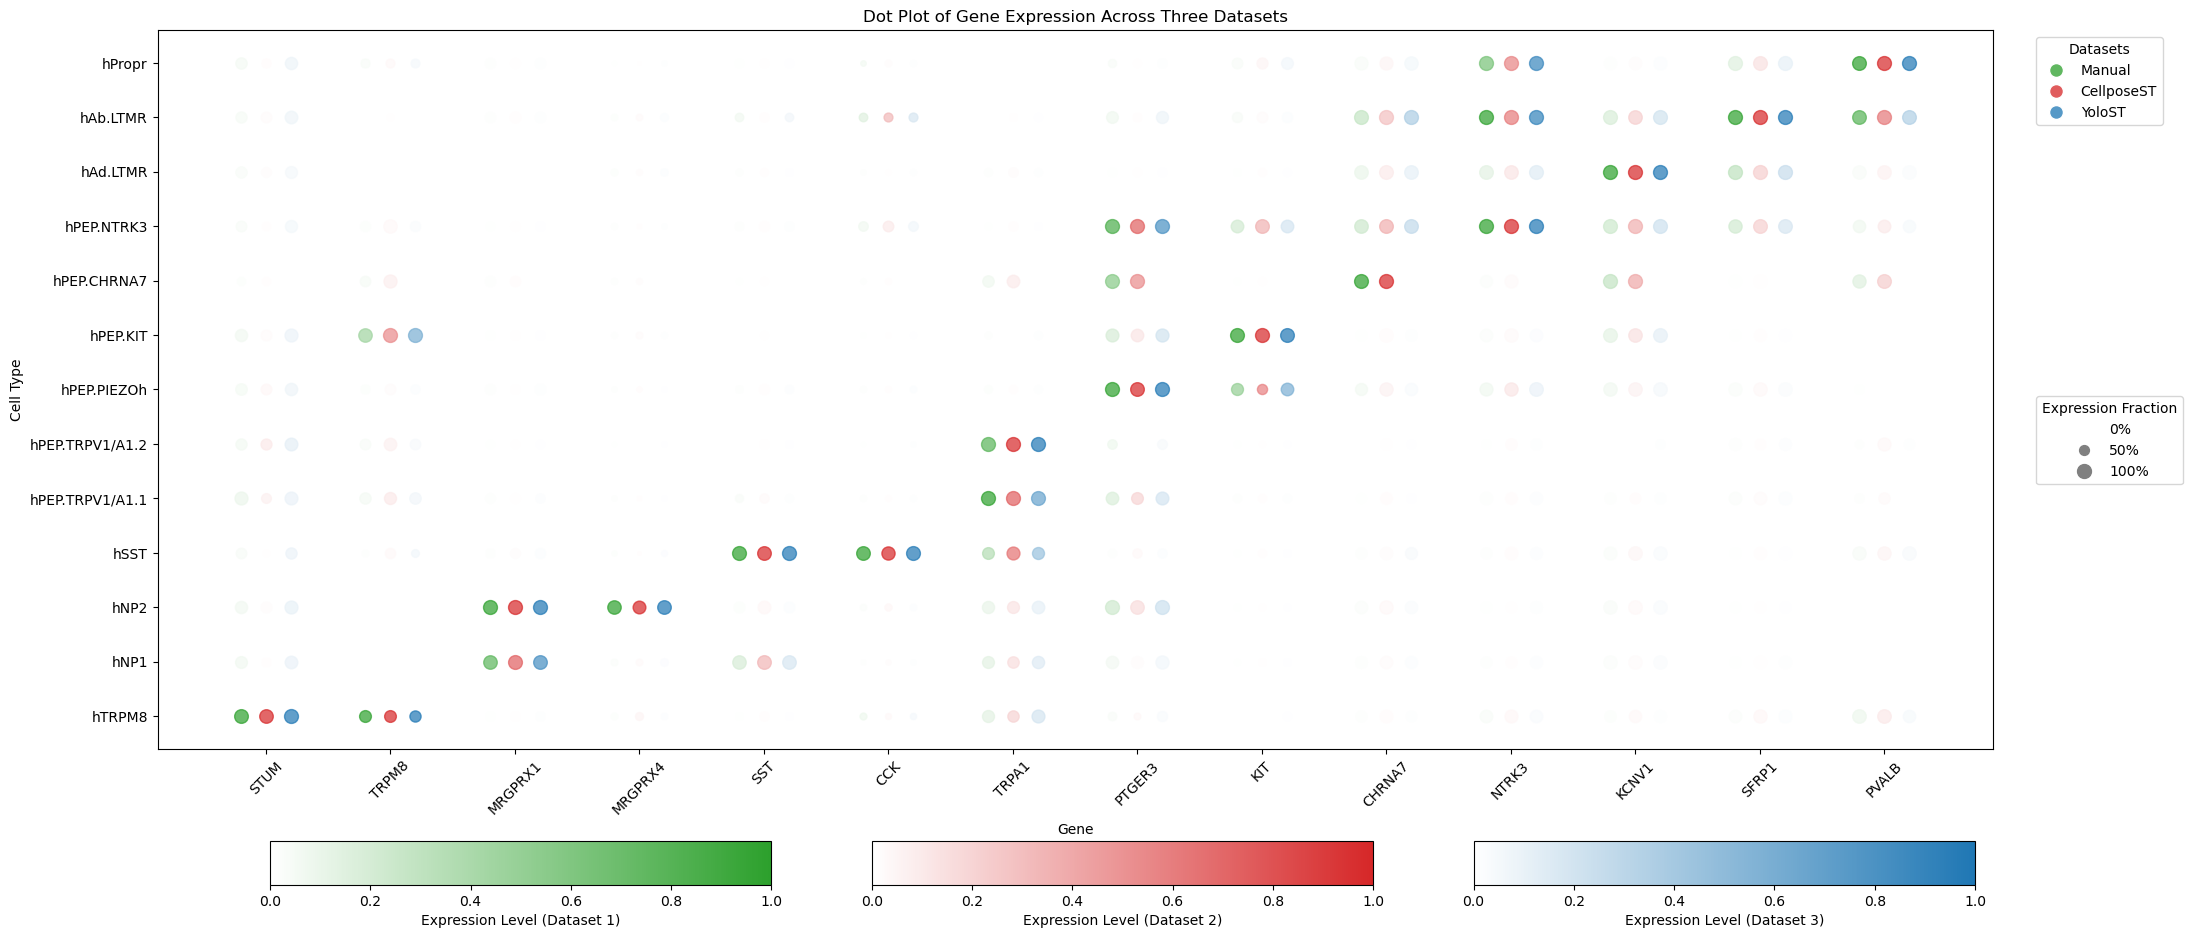

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.colors as mcolors
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec

# Define gene list and cell type order
#gene_list = ["STUM", "TRPM8", "MRGPRX1", "MRGPRX4", "SST", "CCK", "TRPA1", "PTGER3", "KIT", "CHRNA7", "NTRK3", "KCNV1", "SFRP1", "PVALB", "ATF3"]
#cell_type_order = ["hTRPM8", "hNP1", "hNP2", "hSST", "hPEP.TRPV1/A1.1", "hPEP.TRPV1/A1.2", "hPEP.PIEZOh", "hPEP.KIT", "hPEP.CHRNA7", "hPEP.NTRK3", "hPEP.0", "hAd.LTMR", "hAb.LTMR", "hPropr", "hATF3", "discard"]

gene_list = ["STUM", "TRPM8", "MRGPRX1", "MRGPRX4", "SST", "CCK", "TRPA1", "PTGER3", "KIT", "CHRNA7", "NTRK3",  "KCNV1", "SFRP1", "PVALB"]
cell_type_order = ["hTRPM8", "hNP1", "hNP2", "hSST", "hPEP.TRPV1/A1.1", "hPEP.TRPV1/A1.2", "hPEP.PIEZOh", "hPEP.KIT", "hPEP.CHRNA7", "hPEP.NTRK3", "hAd.LTMR", "hAb.LTMR", "hPropr"]

# Load and normalize Dataset 1
expression_data_1 = pd.read_csv(r"C:\E\Posdoc work at Upenn\Lab_work\Projects\Xenium segmentation\Xenium segmentation\GSE273557_hDRG_gene_expression_matrix.csv", index_col=0)
metadata_1 = pd.read_csv(r"C:\E\Posdoc work at Upenn\Lab_work\Projects\Xenium segmentation\Xenium segmentation\GSE273557_hDRG_gene_expression_matrix_metadata_seurat.csv", index_col=0)
expression_data_1_scaled_df = expression_data_1.T
expression_data_1_scaled_df['cell_type'] = metadata_1['corresponding_annotation'].values
fraction_expressed_1 = expression_data_1_scaled_df.groupby('cell_type').apply(lambda x: (x.iloc[:, :-1] > 0).mean())
mean_expression_1 = expression_data_1_scaled_df.groupby('cell_type').mean().iloc[:, :-1]
mean_expression_1 = mean_expression_1 / mean_expression_1.max()

# Load and normalize Dataset 2
expression_data_2 = pd.read_csv(r"C:\E\Posdoc work at Upenn\Lab_work\Projects\Xenium segmentation\Xenium segmentation\CellposeST_prediction_gene_expression_matrix_neuron_marker.csv", index_col=0)
metadata_2 = pd.read_csv(r"C:\E\Posdoc work at Upenn\Lab_work\Projects\Xenium segmentation\Xenium segmentation\CellposeST_prediction_gene_expression_matrix_metadata_seurat.csv", index_col=0)
expression_data_2_scaled_df = expression_data_2.T
common_cells_2 = expression_data_2_scaled_df.index.intersection(metadata_2.index)
expression_data_2_scaled_df = expression_data_2_scaled_df.loc[common_cells_2]
aligned_metadata_2 = metadata_2.loc[common_cells_2]
expression_data_2_scaled_df['cell_type'] = aligned_metadata_2['corresponding_annotation']
fraction_expressed_2 = expression_data_2_scaled_df.groupby('cell_type').apply(lambda x: (x.iloc[:, :-1] > 0).mean())
mean_expression_2 = expression_data_2_scaled_df.groupby('cell_type').mean().iloc[:, :-1]
mean_expression_2 = mean_expression_2 / mean_expression_2.max()

# Load and normalize Dataset 3
expression_data_3 = pd.read_csv(r"C:\E\Posdoc work at Upenn\Lab_work\Projects\Xenium segmentation\Xenium segmentation\yoloST_prediction_gene_expression_matrix_neuron_marker.csv", index_col=0)
metadata_3 = pd.read_csv(r"C:\E\Posdoc work at Upenn\Lab_work\Projects\Xenium segmentation\Xenium segmentation\yoloST_prediction_gene_expression_matrix_metadata_seurat.csv", index_col=0)
expression_data_3_scaled_df = expression_data_3.T
common_cells_3 = expression_data_3_scaled_df.index.intersection(metadata_3.index)
expression_data_3_scaled_df = expression_data_3_scaled_df.loc[common_cells_3]
aligned_metadata_3 = metadata_3.loc[common_cells_3]
expression_data_3_scaled_df['cell_type'] = aligned_metadata_3['corresponding_annotation']
fraction_expressed_3 = expression_data_3_scaled_df.groupby('cell_type').apply(lambda x: (x.iloc[:, :-1] > 0).mean())
mean_expression_3 = expression_data_3_scaled_df.groupby('cell_type').mean().iloc[:, :-1]
mean_expression_3 = mean_expression_3 / mean_expression_3.max()

# Start figure and layout
fig = plt.figure(figsize=(22, 10))
gs = GridSpec(nrows=2, ncols=3, height_ratios=[15, 1], figure=fig)
ax = fig.add_subplot(gs[0, :])

# Define colormaps
cmap1 = LinearSegmentedColormap.from_list("custom_green", ["white", "#2ca02c"])
cmap2 = LinearSegmentedColormap.from_list("custom_red", ["white", "#d62728"])
cmap3 = LinearSegmentedColormap.from_list("custom_blue", ["white", "#1f77b4"])
norm = mcolors.Normalize(vmin=0, vmax=max(mean_expression_1.max().max(), mean_expression_2.max().max(), mean_expression_3.max().max()))
offset = 0.2

# Plot dots
for i, gene in enumerate(gene_list):
    for j, cell_type in enumerate(cell_type_order):
        if gene in mean_expression_1.columns and cell_type in mean_expression_1.index:
            ax.scatter(i - offset, j, s=100 * fraction_expressed_1.loc[cell_type, gene],
                       color=cmap1(norm(mean_expression_1.loc[cell_type, gene])), alpha=0.7)
        if gene in mean_expression_2.columns and cell_type in mean_expression_2.index:
            ax.scatter(i, j, s=100 * fraction_expressed_2.loc[cell_type, gene],
                       color=cmap2(norm(mean_expression_2.loc[cell_type, gene])), alpha=0.7)
        if gene in mean_expression_3.columns and cell_type in mean_expression_3.index:
            ax.scatter(i + offset, j, s=100 * fraction_expressed_3.loc[cell_type, gene],
                       color=cmap3(norm(mean_expression_3.loc[cell_type, gene])), alpha=0.7)

# Format axes
ax.set_xticks(range(len(gene_list)))
ax.set_xticklabels(gene_list, rotation=45)
ax.set_yticks(range(len(cell_type_order)))
ax.set_yticklabels(cell_type_order)
ax.set_xlabel("Gene")
ax.set_ylabel("Cell Type")
ax.set_title("Dot Plot of Gene Expression Across Three Datasets")

# Add colorbars horizontally
cax1 = fig.add_axes(gs[1, 0].get_position(fig))
cax2 = fig.add_axes(gs[1, 1].get_position(fig))
cax3 = fig.add_axes(gs[1, 2].get_position(fig))

sm1 = plt.cm.ScalarMappable(cmap=cmap1, norm=norm)
sm1.set_array([])
cb1 = plt.colorbar(sm1, cax=cax1, orientation='horizontal')
cb1.set_label("Expression Level (Dataset 1)")

sm2 = plt.cm.ScalarMappable(cmap=cmap2, norm=norm)
sm2.set_array([])
cb2 = plt.colorbar(sm2, cax=cax2, orientation='horizontal')
cb2.set_label("Expression Level (Dataset 2)")

sm3 = plt.cm.ScalarMappable(cmap=cmap3, norm=norm)
sm3.set_array([])
cb3 = plt.colorbar(sm3, cax=cax3, orientation='horizontal')
cb3.set_label("Expression Level (Dataset 3)")

# Add legends
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap1(0.75), markersize=10, label='Manual'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap2(0.75), markersize=10, label='CellposeST'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap3(0.75), markersize=10, label='YoloST')
]

size_legend_labels = ['0%', '50%', '100%']
sizes = [0, 50, 100]
legend_sizes = [Line2D([0], [0], marker='o', color='gray', linestyle='None', markersize=np.sqrt(s), label=l)
                for s, l in zip(sizes, size_legend_labels)]

main_legend = ax.legend(handles=legend_elements, title='Datasets', loc='upper left', bbox_to_anchor=(1.02, 1))
ax.add_artist(main_legend)
ax.legend(handles=legend_sizes, title='Expression Fraction', loc='upper left', bbox_to_anchor=(1.02, 0.5))

# Final layout and save
plt.tight_layout(rect=[0, 0.08, 1, 1])
plt.savefig(r"C:\E\Posdoc work at Upenn\Lab_work\Projects\Xenium segmentation\Xenium segmentation\marker_gene_dotplot.svg", format='svg')
plt.show()
